In [1]:
import pandas as pd
import numpy as np

In [2]:
x = np.load('./ml_files/tatanic_X_train.npy')
y = np.load('./ml_files/tatanic_y_train.npy')

In [30]:
x[:2]

array([[0.27345609, 0.01415106, 0.        , 1.        , 0.        ,
        0.125     , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.473882  , 0.13913574, 0.        , 0.        , 1.        ,
        0.125     , 0.25      , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [31]:
y[:5]

array([0., 1., 1., 1., 0.])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [ ]:
# voting

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [37]:
clfdt =  DecisionTreeClassifier(random_state=1)
clflog =  LogisticRegression(random_state=1)
clfknn =  KNeighborsClassifier(n_neighbors=3)
clfgn = GaussianNB()

eclf_h =  VotingClassifier(estimators = [('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='hard')
eclf_s =  VotingClassifier(estimators = [('lr', clflog), ('rf', clfdt), ('gnb', clfgn)], voting='soft')
eclf_k =  VotingClassifier(estimators = [('lr', clflog), ('rf', clfdt), ('knn', clfknn)], voting='soft')
eclf_f =  VotingClassifier(estimators = [('lr', clflog), ('rf', clfdt), ('knn', clfknn), ('gnb', clfgn)], voting='soft')

In [38]:
models = [clflog, clfdt, clfknn, clfgn, eclf_h, eclf_s, eclf_k, eclf_f]

In [39]:
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    score = m.score(x_test, y_test)
    print(m.__class__.__name__, ':', score)
#     print(score)
    print('-'*20)

LogisticRegression : 0.848314606741573
--------------------
DecisionTreeClassifier : 0.797752808988764
--------------------
KNeighborsClassifier : 0.8146067415730337
--------------------
GaussianNB : 0.43820224719101125
--------------------
VotingClassifier : 0.8370786516853933
--------------------
VotingClassifier : 0.8258426966292135
--------------------
VotingClassifier : 0.8426966292134831
--------------------
VotingClassifier : 0.8258426966292135
--------------------


In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, \
                                                    test_size=0.2, random_state=111)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, \
                                                    test_size=0.2, random_state=111)

In [41]:
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    score = m.score(x_test, y_test)
    print(m.__class__.__name__, ':', score)
#     print(score)
    print('-'*20)

LogisticRegression : 0.9473684210526315
--------------------
DecisionTreeClassifier : 0.9473684210526315
--------------------
KNeighborsClassifier : 0.9298245614035088
--------------------
GaussianNB : 0.9473684210526315
--------------------
VotingClassifier : 0.9736842105263158
--------------------
VotingClassifier : 0.9736842105263158
--------------------
VotingClassifier : 0.956140350877193
--------------------
VotingClassifier : 0.9649122807017544
--------------------


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [42]:
# bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

In [46]:
x = np.load('./ml_files/tatanic_X_train.npy')
y = np.load('./ml_files/tatanic_y_train.npy')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [47]:
clf2 = DecisionTreeClassifier(random_state=1)
eclf = BaggingClassifier(clf2, oob_score=True)

In [55]:
clf2.fit(x_train, y_train)
preds = clf2.predict(x_test)
clf2.score(x_test, y_test)

0.797752808988764

In [51]:
eclf.fit(x_train, y_train)

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [56]:
predictions = eclf.predict(x_test)
eclf.score(x_test, y_test)

0.8089887640449438

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       104
         1.0       0.83      0.68      0.75        74

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [62]:
params = {
    'n_estimators': [10, 20, 50, 70, 100, 200],
    'max_samples' : [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = eclf, param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\tjoeun\anaconda3\lib\site-packages

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                      

In [63]:
grid.score(x_test, y_test)

0.848314606741573

In [64]:
#  RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
x = np.load('./ml_files/tatanic_X_train.npy')
y = np.load('./ml_files/tatanic_y_train.npy')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [67]:
eclf = RandomForestClassifier(n_estimators = 100, max_features=2, oob_score=True)

In [68]:
eclf.fit(x_train, y_train)
preds = eclf.predict(x_test)
eclf.score(x_test, y_test)

0.8314606741573034

In [75]:
len(x[0])

27

In [76]:
params = {
    'n_estimators':[100, 200, 500, 1000],
    'max_samples' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'max_features':[10,20,len(x[0])]    
}

In [77]:
grid = GridSearchCV(estimator = eclf, param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=None,
                                   

In [78]:
grid.score(x_test, y_test)

0.8595505617977528

In [79]:
# boosting : AdaBoosting

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
eclf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators= 500,
                         learning_rate=0.1)

In [88]:
eclf.fit(x_train, y_train)
preds = eclf.predict(x_test)
eclf.score(x_test, y_test)

0.8146067415730337

In [89]:
params = {
    'n_estimators':[100, 300, 500, 700, 1000],
    'learning_rate':[0.4, 0.5, 0.6, 0.7, 0.9, 1]
}

In [84]:
grid= GridSearchCV(estimator=eclf, param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1

In [85]:
grid.score(x_test, y_test)

0.8314606741573034

In [98]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, \
                                                    test_size=0.2, random_state=111)

In [99]:
eclf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators= 500,
                         learning_rate=0.1)

In [100]:
eclf.fit(x_train, y_train)
preds = eclf.predict(x_test)
eclf.score(x_test, y_test)

0.9473684210526315

In [101]:
params = {
    'n_estimators':[100, 300, 500, 700, 1000],
    'learning_rate':[0.4, 0.5, 0.6, 0.7, 0.9, 1]
}

In [102]:
grid= GridSearchCV(estimator=eclf, param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1

In [103]:
grid.score(x_test, y_test)

0.9473684210526315

In [104]:
# boost : gredientboosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
x = np.load('./ml_files/tatanic_X_train.npy')
y = np.load('./ml_files/tatanic_y_train.npy')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [132]:
gbc = GradientBoostingClassifier(n_estimators= 500, learning_rate=0.1)

In [133]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
preds = gbc.predict(x_test)
gbc.score(x_test, y_test)

0.8539325842696629

In [135]:
params = {
    'n_estimators':[500, 1000, 2000],
    'learning_rate':[0.1, 0.05],
    'subsample':[0.4, 0.5],
    'max_depth':[2, 4],
    'min_samples_leaf':[3, 5],
    'max_features':[1.0, 0.3]
}

In [136]:
# grid= GridSearchCV(estimator=eclf, param_grid=params, refit=True, verbose=True)
# grid.fit(x_train, y_train)

grid = GridSearchCV(estimator = gbc, param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  6.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_n...
                 

In [137]:
grid.score(x_test, y_test)

0.848314606741573

In [139]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.3,
 'min_samples_leaf': 3,
 'n_estimators': 500,
 'subsample': 0.4}

In [141]:
gbc1 = GradientBoostingClassifier(n_estimators= 500, learning_rate=0.1, max_depth = 2, max_features=0.3, \
                                min_samples_leaf=3, subsample=0.4)

In [143]:
gbc1.fit(x_train, y_train)
preds = gbc1.predict(x_test)
gbc1.score(x_test, y_test)

0.8595505617977528

In [ ]:
# C:\Windows\system32>conda install -c anaconda py-xgboost
# C:\Windows\system32>conda install -c conda-forge lightgbm

In [3]:
import xgboost

In [7]:
xgboost.__version__

'0.90'

In [5]:
import lightgbm

In [6]:
lightgbm.__version__

'2.3.1'

In [ ]:
# boosting

# AdaBoosting > Gredientboosting > xgboost > lightgbm

# Xgboost
# 1. gradientboosting의 느린 속도를 개선
# 2. 과적합 개선
# 3. Tree Prunning - 의미없는 node를 제거

# lightgbm
# xgboost의 속도를 더욱 개선.

In [8]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

In [11]:
x = np.load('./ml_files/tatanic_X_train.npy')
y = np.load('./ml_files/tatanic_y_train.npy')

In [14]:
x[:2]

array([[0.27345609, 0.01415106, 0.        , 1.        , 0.        ,
        0.125     , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.473882  , 0.13913574, 0.        , 0.        , 1.        ,
        0.125     , 0.25      , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [15]:
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split\
(x,y, test_size=0.2, random_state=111)

In [19]:
# 1. python api 이용

In [20]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [28]:
param = {'max_depth':2, 'eta':0.5, 'silent':1, 'objective':'binary:logistic'}
param['nthread'] = 7
param['eval_metric'] = 'auc'

In [29]:
evalist = [(dtest, 'eval'), (dtrain, 'train')]

In [30]:
plst = param.items()
plst

dict_items([('max_depth', 2), ('eta', 0.5), ('silent', 1), ('objective', 'binary:logistic'), ('nthread', 7), ('eval_metric', 'auc')])

In [31]:
num_round = 50
bst = xgb.train(plst, dtrain, num_round, evalist)

[0]	eval-auc:0.867204	train-auc:0.838887
[1]	eval-auc:0.869543	train-auc:0.851631
[2]	eval-auc:0.873051	train-auc:0.85615
[3]	eval-auc:0.886045	train-auc:0.870233
[4]	eval-auc:0.890333	train-auc:0.871568
[5]	eval-auc:0.884745	train-auc:0.882094
[6]	eval-auc:0.87539	train-auc:0.888418
[7]	eval-auc:0.874545	train-auc:0.891886
[8]	eval-auc:0.879938	train-auc:0.893917
[9]	eval-auc:0.877859	train-auc:0.895442
[10]	eval-auc:0.879158	train-auc:0.896735
[11]	eval-auc:0.877339	train-auc:0.899447
[12]	eval-auc:0.882147	train-auc:0.902163
[13]	eval-auc:0.879613	train-auc:0.902454
[14]	eval-auc:0.879873	train-auc:0.902969
[15]	eval-auc:0.876949	train-auc:0.904549
[16]	eval-auc:0.873181	train-auc:0.910404
[17]	eval-auc:0.871946	train-auc:0.911181
[18]	eval-auc:0.871946	train-auc:0.911734
[19]	eval-auc:0.869867	train-auc:0.913103
[20]	eval-auc:0.871297	train-auc:0.913914
[21]	eval-auc:0.866489	train-auc:0.914843
[22]	eval-auc:0.867529	train-auc:0.91543
[23]	eval-auc:0.870907	train-auc:0.916998
[24]	

In [34]:
predictions = bst.predict(dtest)
np.round(predictions, 2)

array([0.59, 0.05, 0.84, 0.11, 0.16, 0.76, 0.02, 0.95, 0.08, 0.14, 0.12,
       0.15, 0.22, 0.81, 0.2 , 0.03, 0.69, 0.09, 0.11, 0.92, 0.72, 0.31,
       0.1 , 0.94, 0.14, 0.36, 0.33, 0.95, 0.06, 0.85, 0.15, 0.08, 0.85,
       0.81, 0.24, 0.61, 0.88, 0.08, 0.95, 0.13, 0.1 , 0.04, 0.93, 0.33,
       0.02, 0.42, 0.04, 0.98, 0.99, 0.17, 0.08, 0.14, 0.71, 0.24, 0.08,
       0.  , 0.96, 0.25, 0.06, 0.14, 0.15, 0.12, 0.78, 0.  , 0.53, 0.15,
       0.46, 0.01, 0.11, 0.92, 0.37, 0.54, 0.06, 0.15, 0.92, 0.99, 0.05,
       0.09, 0.06, 0.84, 0.11, 0.28, 0.37, 0.95, 0.11, 0.09, 0.1 , 0.08,
       0.9 , 0.39, 0.08, 0.08, 0.34, 0.38, 0.79, 0.6 , 0.09, 0.14, 0.41,
       0.05, 0.9 , 0.38, 0.06, 0.03, 0.09, 0.02, 0.61, 0.09, 0.88, 0.91,
       0.97, 0.03, 0.47, 0.97, 0.19, 0.96, 0.47, 0.33, 0.99, 0.02, 0.74,
       0.52, 0.73, 0.71, 0.86, 0.02, 0.15, 0.95, 0.99, 0.62, 0.08, 0.55,
       0.18, 0.12, 0.58, 0.13, 0.13, 0.27, 0.55, 0.02, 0.95, 0.47, 0.46,
       0.01, 0.38, 0.08, 0.13, 0.97, 0.67, 0.79, 0.

In [41]:
np.mean((predictions > 0.5 ) == y_test)

0.8651685393258427

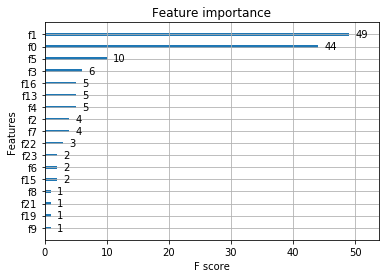

In [42]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_importance(bst, ax=ax)
plt.show()

In [43]:
# sklearn xgboost

In [44]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

In [45]:
xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgb.fit(x_train, y_train)
preds = xgb.predict(x_test)
xgb.score(x_test, y_test)

0.8539325842696629

In [46]:
# lightgbm

In [48]:
from lightgbm import LGBMClassifier

In [49]:
lgbm = LGBMClassifier(n_estimators= 400, learning_rate=0.1, max_depth=3)
lgbm.fit(x_train, y_train)
preds = lgbm.predict(x_test)
lgbm.score(x_test, y_test)

0.848314606741573

In [50]:
# breast_cancer_data를 xgboost와 lightgbm으로 classification..

In [52]:
from sklearn.datasets import load_breast_cancer

In [53]:
data = load_breast_cancer()

In [55]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [57]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [59]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [60]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [63]:
# x data, y data divide

x = pd.DataFrame(data.data, columns = data.feature_names)  # 독립변수 : features
y = data.target          # 종속변수 : label, target

# x => y : x로 y를 예측하는 모델을 생성..

In [65]:
x.shape

(569, 30)

In [66]:
y.shape

(569,)

In [68]:
# train data, test data split

x_train, x_test, y_train, y_test = train_test_split\
(x,y, test_size=0.2, random_state=111)

In [72]:
# algorithm import => instance생성

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
lgbm = LGBMClassifier(n_estimators= 400, learning_rate=0.1, max_depth=3)

In [ ]:
# xgb : algorithm train => model => predict => score evaluation

In [73]:
xgb.fit(x_train, y_train)    # train => model
preds = xgb.predict(x_test)  # model prediction = > preds
xgb.score(x_test, y_test)    # model evaluation

0.9912280701754386

In [ ]:
# lightgbm : algorithm train => model => predict => score evaluation

In [74]:
lgbm.fit(x_train, y_train)
preds = lgbm.predict(x_test)
lgbm.score(x_test, y_test)

0.9912280701754386